In [1]:
from PIL import Image
from IPython.display import display
import torch as th

def inverse_normalize(img, mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711)):
    """
    :param img: numpy array. shape (B, C, H, W) or (C, H, W). [-1~1]
    :return: numpy array. shape (height, width, channel). [0~1]
    """
    if len(img.shape) == 4:
        for i in range(3):
            img[:, i,:, :] = ((img[:, i,:,:]) * std[i]) + mean[i]
    elif len(img.shape) == 3:
        for i in range(3):
            img[i,:, :] = ((img[i,:,:]) * std[i]) + mean[i]

    return img*255

def show_images(batch: th.Tensor):
    """ Display a batch of images inline. """
    scaled = inverse_normalize(batch, (0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)).round().clamp(0,255).to(th.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    display(Image.fromarray(reshaped.numpy()))

def ret_images(batch: th.Tensor):
    """ Display a batch of images inline. """
    scaled = inverse_normalize(batch, (0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)).round().clamp(0,255).to(th.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    return (Image.fromarray(reshaped.numpy()))

/home/yewon/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  0%|          | 0/6435 [00:00<?, ?it/s]

torch.Size([3, 64, 64]) {'condi_img': tensor([[[-1.4684, -1.7577, -2.2547,  ..., -1.3911, -1.9433, -2.1121],
         [-1.8596, -1.5460, -1.7061,  ..., -1.5386, -1.3435, -1.3607],
         [-1.9650, -1.6471, -1.3805,  ..., -1.8032, -1.7955, -2.0441],
         ...,
         [-2.2399, -1.6814, -1.3054,  ..., -1.7932, -1.6803, -1.7091],
         [-1.8483, -1.7214, -1.8474,  ..., -1.9287, -1.1017, -1.5753],
         [-1.9122, -1.7948, -1.7939,  ..., -2.2140, -1.7715, -1.6615]],

        [[-1.8653, -1.2337, -1.5018,  ..., -1.8612, -1.4418, -2.0453],
         [-1.1623, -2.2580, -1.7809,  ..., -1.1740, -1.6125, -1.7131],
         [-2.2480, -1.3131, -1.3565,  ..., -1.7723, -1.5732, -2.1196],
         ...,
         [-1.8782, -2.2076, -1.4271,  ..., -1.9822, -1.8147, -1.8711],
         [-1.5853, -1.2521, -2.0185,  ..., -2.3017, -1.6467, -2.2153],
         [-1.6159, -1.3907, -1.4243,  ..., -1.3342, -1.8283, -1.8059]],

        [[-1.4012, -1.7238, -1.5291,  ..., -1.5433, -1.1285, -1.4441],
       

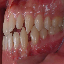

  0%|          | 0/6435 [00:00<?, ?it/s]


In [3]:
from gita.data.teeth_img import PairedTeethImageData
from torchvision.transforms import ToPILImage
import torch
import os
from tqdm.auto import tqdm
data = PairedTeethImageData(img_dir='/home/yewon/GITA/dataset/train',
                            istrain=True, 
                            condi_aug_level=0.3,
                            super_res=True,
                            low_res_image_dir='/home/yewon/GITA/low_res_dataset/train',
                            low_res_size=64,
                            )


In [ ]:
for batch, cond in tqdm(data):
    if cond['low_res']== None:
        print("좆댓다")
        break